# PROBLEM STATEMENT
## BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES

#### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
#### Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data set

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cancer["filename"])

C:\Users\paradise com\anaconda3\lib\site-packages\sklearn\datasets\data\breast_cancer.csv


In [7]:
print(cancer["target_names"])

['malignant' 'benign']


In [8]:
print(cancer["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
cancer["data"].shape

(569, 30)

In [10]:
data = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"], ["Target"]))

In [11]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [12]:
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [13]:
data.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1.0
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1.0
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1.0
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0.0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1.0


In [14]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Visualize the Data


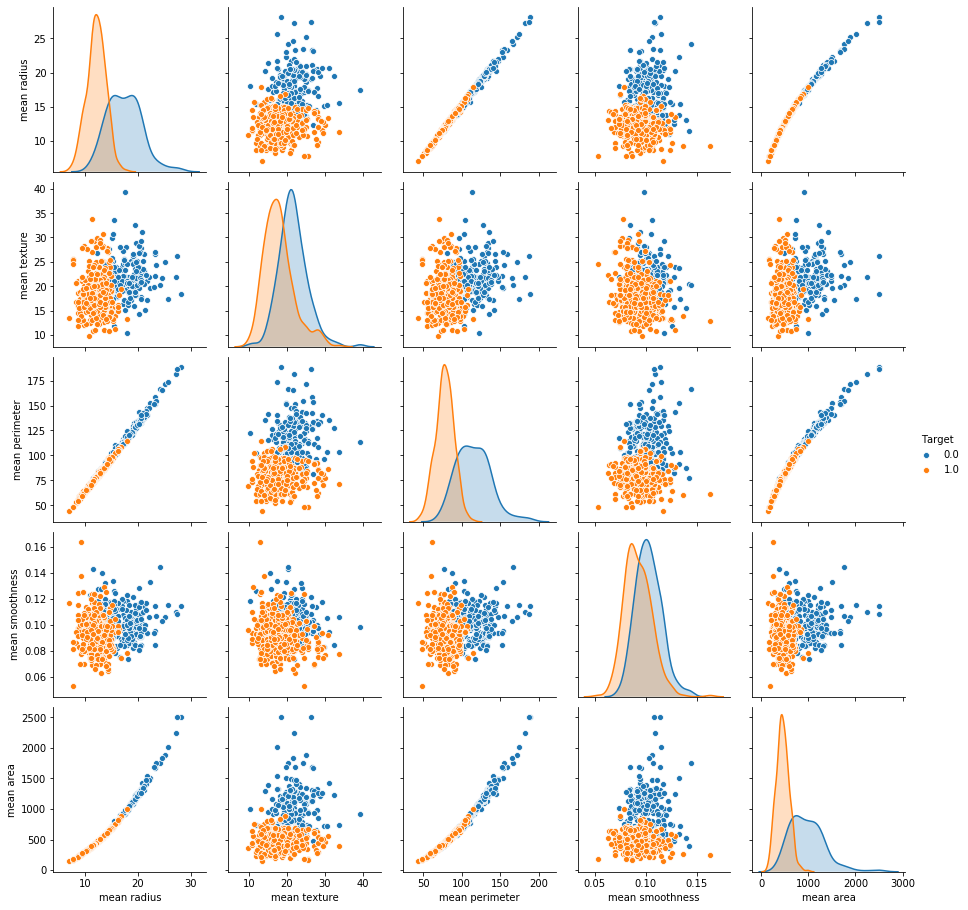

In [15]:
sns.pairplot(data= data, vars = ["mean radius", "mean texture", "mean perimeter", "mean smoothness", "mean area"], hue = "Target")

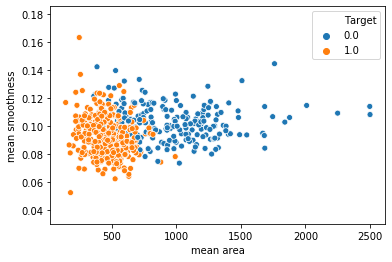

In [16]:
sns.scatterplot(x = "mean area", y = "mean smoothness", hue = "Target", data = data)

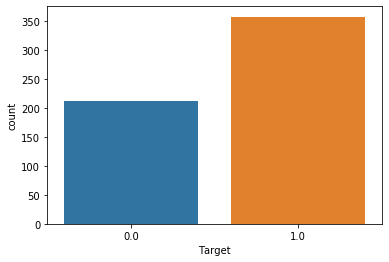

In [17]:
sns.countplot(data["Target"])


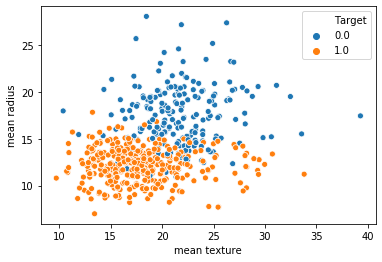

In [18]:
sns.scatterplot(x= "mean texture", y = "mean radius", data = data, hue = "Target")

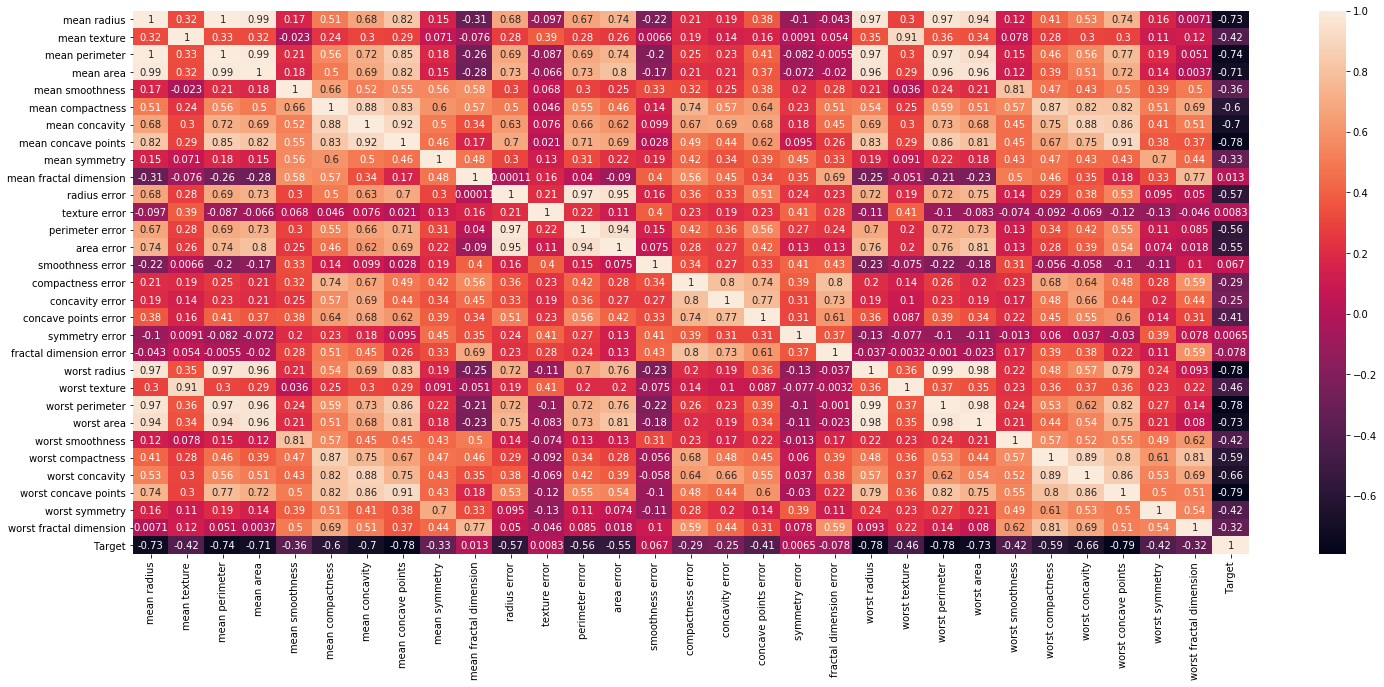

In [19]:
plt.figure(figsize = [25, 10])
sns.heatmap(data.corr(), annot = True)

# Model Training


In [20]:
X = data.drop(["Target"], axis = 1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
y =  data["Target"]
y.head(n = 10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Target, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size = 0.20)

In [23]:
X_train.shape

(455, 30)

In [24]:
y_train.shape

(455,)

In [25]:
y_test.shape

(114,)

In [26]:
X_test.shape

(114, 30)

In [27]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Model Testing


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        41
         1.0       1.00      0.90      0.95        73

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



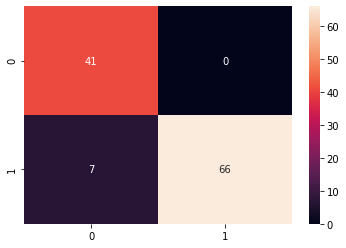

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
predict_y = model_svc.predict(X_test)
predict_y
cm = confusion_matrix(predict_y, y_test)
sns.heatmap(cm, annot = True, fmt = "d")
print(classification_report(predict_y, y_test))

# APPROACH 1
# Improving the model accuracy 
### normalizing the data

In [29]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.73560,0.20340,0.3274,0.12520


In [30]:
min_X_train = X_train.min()
min_X_train

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.362100
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000950
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [31]:
X_train_range = (X_train - min_X_train).max()

In [32]:
X_scaled = (X_train - min_X_train)/X_train_range
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,0.294335,0.206628,0.278350,0.167183,0.293220,0.101620,0.003423,0.016208,0.288889,0.196113,...,0.257245,0.224680,0.244087,0.139122,0.321641,0.104113,0.010136,0.085911,0.258019,0.188968
410,0.207251,0.265810,0.198328,0.108809,0.324546,0.103521,0.065206,0.104374,0.273232,0.200262,...,0.203255,0.647655,0.203416,0.103517,0.572742,0.130890,0.163891,0.298900,0.334521,0.146989
197,0.525297,0.410213,0.508673,0.373806,0.190304,0.205632,0.258435,0.287177,0.358586,0.075126,...,0.469631,0.337953,0.461823,0.321178,0.131731,0.163974,0.229412,0.315498,0.191019,0.069133
376,0.169861,0.355428,0.182157,0.082700,0.343956,0.449727,0.534208,0.295278,0.569697,0.754313,...,0.115919,0.287846,0.153178,0.051343,0.333230,0.324640,0.545701,0.503436,0.245189,0.426079
244,0.587770,0.466351,0.589524,0.429421,0.452018,0.418441,0.480084,0.441650,0.463636,0.219262,...,0.544661,0.493337,0.554551,0.379389,0.580468,0.261480,0.312941,0.537457,0.321929,0.138397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.284869,0.409537,0.302052,0.159754,0.674099,0.533157,0.435567,0.464861,0.651515,0.522603,...,0.300119,0.498667,0.327425,0.170660,0.765897,0.497531,0.487783,0.707904,0.668330,0.342123
73,0.322732,0.205614,0.322300,0.187052,0.433962,0.333170,0.182498,0.251938,0.304040,0.342870,...,0.342993,0.235608,0.351488,0.193175,0.540292,0.317170,0.251493,0.475258,0.243288,0.314574
400,0.517251,0.382482,0.557045,0.361070,0.635280,0.730691,0.747188,0.595427,0.531818,0.462765,...,0.510917,0.420043,0.582135,0.344585,0.897242,0.547593,0.817557,0.674914,0.399145,0.424767
118,0.416442,0.446398,0.427821,0.271322,0.567572,0.477946,0.499766,0.471123,0.523232,0.509937,...,0.486701,0.492537,0.468866,0.334730,0.883335,0.451349,0.665701,0.698969,0.406035,0.460186


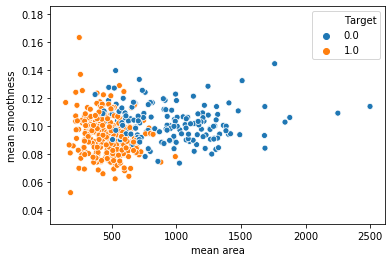

In [33]:
sns.scatterplot(x = X_train["mean area"], y = X_train["mean smoothness"], hue = y_train )

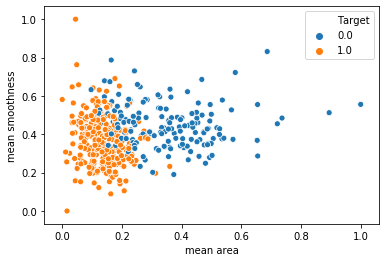

In [34]:
sns.scatterplot(x = X_scaled["mean area"], y = X_scaled["mean smoothness"], hue = y_train )

In [35]:
y_min = X_test.min()
y_min

mean radius                  8.219000
mean texture                10.720000
mean perimeter              53.270000
mean area                  203.900000
mean smoothness              0.065760
mean compactness             0.035150
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.120300
mean fractal dimension       0.050540
radius error                 0.119400
texture error                0.360200
perimeter error              0.848400
area error                   9.227000
smoothness error             0.002838
compactness error            0.005656
concavity error              0.000000
concave points error         0.000000
symmetry error               0.010550
fractal dimension error      0.000895
worst radius                 9.092000
worst texture               12.870000
worst perimeter             58.080000
worst area                 249.800000
worst smoothness             0.087990
worst compactness            0.064770
worst concav

In [36]:
y_range = (X_test - y_min).max()
y_scaled = (X_test - y_min)/y_range
y_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,0.368783,0.7275,0.367657,0.230073,0.553036,0.487059,0.462999,0.457449,0.518651,0.316844,...,0.414799,0.796791,0.472349,0.254533,0.565411,0.625600,0.505990,0.734398,0.476334,0.360276
163,0.214624,0.5750,0.198907,0.113447,0.461819,0.240181,0.147730,0.147517,0.249641,0.363966,...,0.166543,0.528409,0.151616,0.075720,0.425006,0.193591,0.134824,0.297315,0.123546,0.291857
123,0.327118,0.0085,0.306892,0.190153,0.577795,0.270588,0.243246,0.302039,0.468436,0.287420,...,0.245213,0.103944,0.231566,0.123795,0.321744,0.130599,0.204473,0.443033,0.248095,0.199138
361,0.264622,0.5425,0.239243,0.148970,0.261402,0.103457,0.091994,0.126712,0.439024,0.136887,...,0.189550,0.545789,0.180510,0.092753,0.193225,0.116741,0.096805,0.203701,0.197553,0.082981
549,0.135462,0.6745,0.116890,0.068652,0.210581,0.111747,0.042586,0.042656,0.554519,0.271642,...,0.146133,0.620989,0.133699,0.063883,0.240770,0.112847,0.049473,0.118433,0.282190,0.166394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.359929,0.9545,0.325077,0.224457,0.227261,0.039457,0.128913,0.143178,0.465567,0.051173,...,0.303102,0.803476,0.269366,0.170221,0.199168,0.038814,0.123562,0.238570,0.317088,0.040500
515,0.162544,0.3945,0.145850,0.081538,0.510034,0.180416,0.118349,0.135599,0.519369,0.246695,...,0.125353,0.339572,0.109103,0.057140,0.448035,0.106090,0.129712,0.309942,0.282391,0.093753
186,0.525546,0.3930,0.488887,0.364416,0.262184,0.179294,0.224732,0.303921,0.299857,0.079104,...,0.453392,0.450869,0.420050,0.289746,0.263056,0.205846,0.282588,0.570029,0.311673,0.107109
3,0.166710,0.4830,0.181920,0.079317,1.000000,0.900452,0.664099,0.549922,1.000000,1.000000,...,0.215897,0.455548,0.211216,0.079392,0.904910,0.917996,0.548642,0.934325,1.000000,1.000000


In [37]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

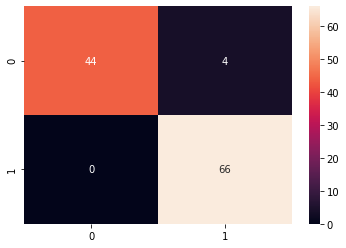

In [38]:
y_predict = svc_model.predict(y_scaled)
cm = confusion_matrix(y_test, y_predict )

sns.heatmap(cm, annot = True, fmt = "d")

In [39]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# APPROACH 2
# Improving model performance 
## parameter optimization 


In [40]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [43]:
grid.fit(X_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [44]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [45]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
grid_predict = grid.predict(y_scaled)

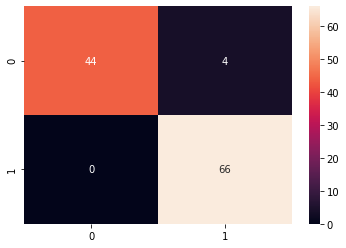

In [47]:
cm = confusion_matrix(y_test, grid_predict)
sns.heatmap(cm, annot = True)

In [48]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

